In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("creditCard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False).head()


Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
dtype: float64

In [8]:
df.shape

(284807, 31)

In [9]:
df.drop_duplicates(subset=None, inplace=True)
df.shape

(283726, 31)

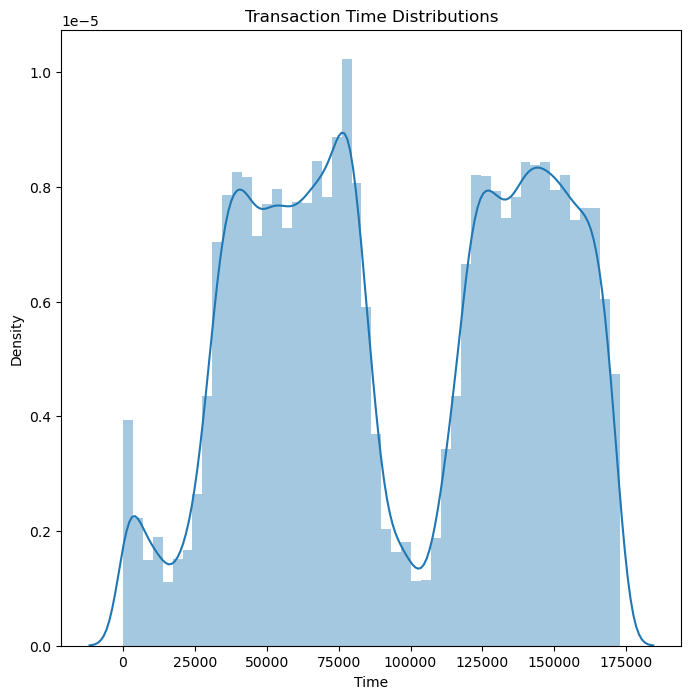

In [10]:
plt.figure(figsize=(8,8))
plt.title('Transaction Time Distributions')
sns.distplot(df['Time'])
plt.show()

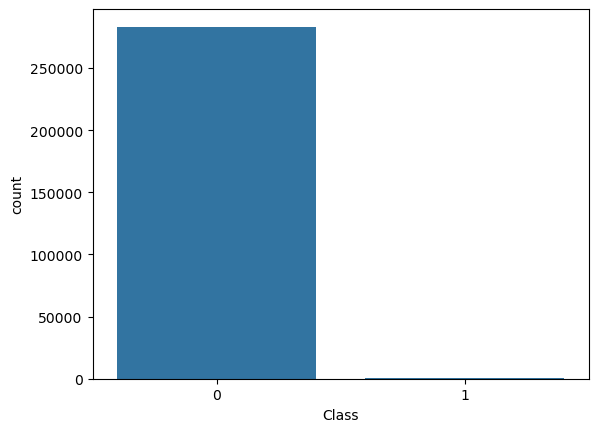

In [11]:
df.Class.value_counts()
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Class', data=df)
plt.show()


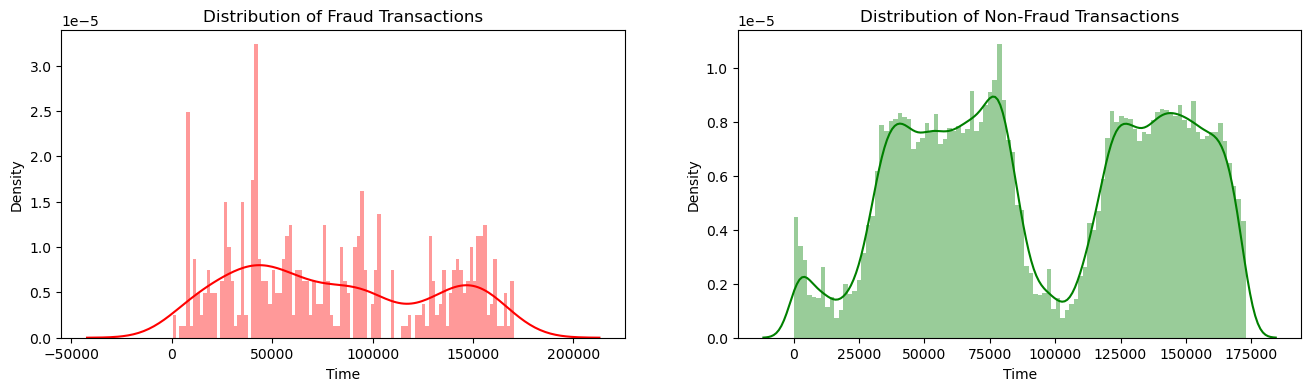

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'],bins=100,color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100,color='green', ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()   #to observe pattern but no significant pattern is observed

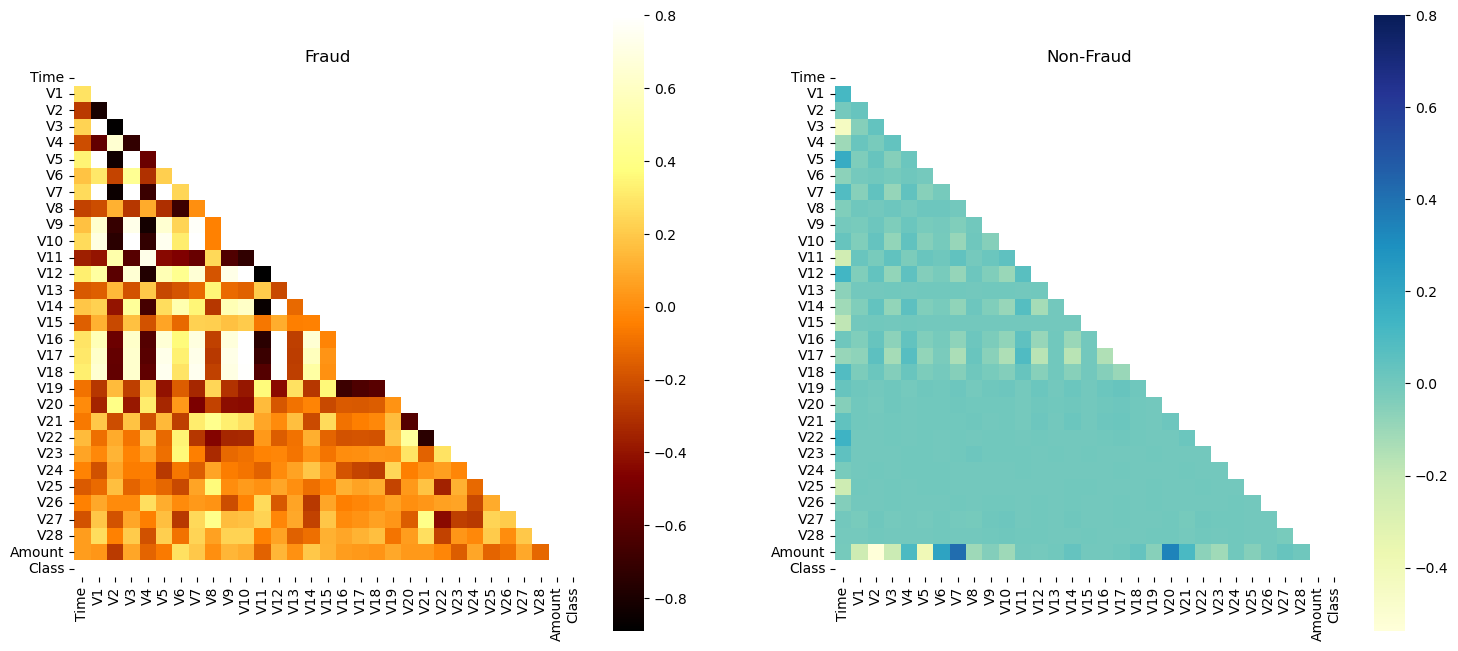

In [13]:
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((df.loc[df['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((df.loc[df['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Non-Fraud')
plt.show()

In [14]:
# Scale amount by log
df['amount_log'] = np.log(df.Amount + 0.01)

#Scale amount by Standardization
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
df['amount_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

#Scale amount by Normalization
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
df['amount_minmax'] = norm.fit_transform(df['Amount'].values.reshape(-1,1))

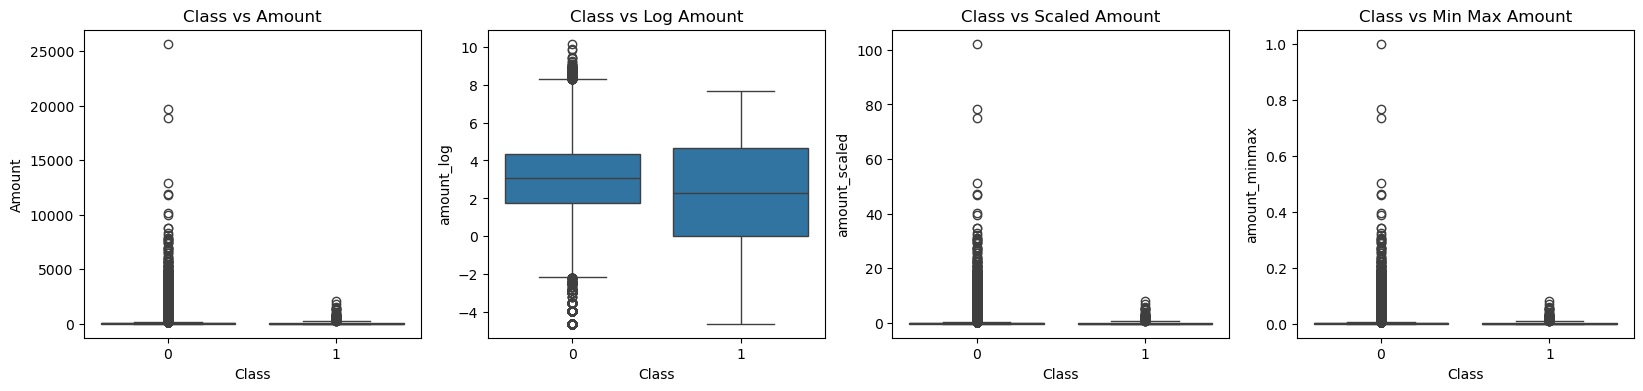

In [15]:
fig,axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (20,4))

sns.boxplot(x ="Class",y="Amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="Class",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="Class",y="amount_scaled",data=df, ax = axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x ="Class",y="amount_minmax",data=df, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")

plt.show()

In [16]:
X = df.drop(['Class','Amount','amount_minmax','amount_scaled'],axis=1)
y = df['Class']


from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn import metrics
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.248461
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210844
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217889
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.303585


In [17]:
#Random Under Sample Dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, shuffle=True)

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')

rus= RandomUnderSampler(sampling_strategy='majority')
X_train_under,y_train_under=rus.fit_resample(X_train, y_train)
X_test_under, y_test_under = X_test, y_test

print("X_train_under: ",X_train_under.shape)
print("y_train_under: ",y_train_under.shape)
print("X_test_under: ",X_test_under.shape)
print("y_test_under: ",y_test_under.shape)

X_train:  (198608, 30)
y_train:  (198608,)
X_test:  (85118, 30)
y_test:  (85118,)


............


X_train_under:  (664, 30)
y_train_under:  (664,)
X_test_under:  (85118, 30)
y_test_under:  (85118,)


In [18]:
#Random Over Sampler Dataset
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')

ros= RandomOverSampler(sampling_strategy='minority')
X_train_over,y_train_over=ros.fit_resample(X_train, y_train)
X_test_over, y_test_over = X_test, y_test

print("X_train_over: ",X_train_over.shape)
print("y_train_over: ",y_train_over.shape)
print("X_test_over: ",X_test_over.shape)
print("y_test_over: ",y_test_over.shape)

X_train:  (198608, 30)
y_train:  (198608,)
X_test:  (85118, 30)
y_test:  (85118,)


............


X_train_over:  (396552, 30)
y_train_over:  (396552,)
X_test_over:  (85118, 30)
y_test_over:  (85118,)


In [19]:
# SMOTE
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')


smote= SMOTE(sampling_strategy='minority')
X_train_smote,y_train_smote=smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)

X_train:  (198608, 30)
y_train:  (198608,)
X_test:  (85118, 30)
y_test:  (85118,)


............


X_train_smote:  (396552, 30)
y_train_smote:  (396552,)
X_test_smote:  (85118, 30)
y_test_smote:  (85118,)


In [20]:
# ADASYN
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')
 

adasyn= ADASYN(sampling_strategy='minority')
X_train_adasyn,y_train_adasyn=adasyn.fit_resample(X_train, y_train)
X_test_adasyn, y_test_adasyn = X_test, y_test

print("X_train_adasyn: ",X_train_adasyn.shape)
print("y_train_adasyn: ",y_train_adasyn.shape)
print("X_test_adasyn: ",X_test_adasyn.shape)
print("y_test_adasyn: ",y_test_adasyn.shape)

X_train:  (198608, 30)
y_train:  (198608,)
X_test:  (85118, 30)
y_test:  (85118,)


............


X_train_adasyn:  (396494, 30)
y_train_adasyn:  (396494,)
X_test_adasyn:  (85118, 30)
y_test_adasyn:  (85118,)


In [21]:
names=[]
aucs_tests = []
accuracy_tests = []
precision_tests = []
recall_tests = []
f1_score_tests = []

def performance(model):
    for name, model, X_train, y_train, X_test, y_test in model:
        
        #appending name
        names.append(name)
        
        # Build model
        model.fit(X_train, y_train)
        
        #predictions
        y_test_pred = model.predict(X_test)
        
        # calculate accuracy
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_tests.append(Accuracy_test)
        
        # calculate auc
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_tests.append(Aucs_test)
        
        #precision_calculation
        Precision_score_test = metrics.precision_score(y_test , y_test_pred)
        precision_tests.append(Precision_score_test)
        
        # calculate recall
        Recall_score_test = metrics.recall_score(y_test , y_test_pred)
        recall_tests.append(Recall_score_test)
        
        #calculating F1
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_score_tests.append(F1Score_test)
        
        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
        
        print("Model Name :", name)
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        print('Test Precision : {0:0.5f}'.format(Precision_score_test))
        print('Test Recall : {0:0.5f}'.format(Recall_score_test))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")

        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

Model Name : LR IMBALANCED
Test Accuracy :0.99834
Test AUC : 0.50000
Test Precision : 0.00000
Test Recall : 0.00000
Test F1 : 0.00000
Confusion Matrix : 
 [[84977     0]
 [  141     0]]


Model Name : LR UNDERSAMPLE
Test Accuracy :0.99834
Test AUC : 0.50000
Test Precision : 0.00000
Test Recall : 0.00000
Test F1 : 0.00000
Confusion Matrix : 
 [[84977     0]
 [  141     0]]


Model Name : LR OVERSAMPLE
Test Accuracy :0.99645
Test AUC : 0.79289
Test Precision : 0.25382
Test Recall : 0.58865
Test F1 : 0.35470
Confusion Matrix : 
 [[84733   244]
 [   58    83]]


Model Name : LR SMOTE
Test Accuracy :0.99638
Test AUC : 0.79640
Test Precision : 0.25075
Test Recall : 0.59574
Test F1 : 0.35294
Confusion Matrix : 
 [[84726   251]
 [   57    84]]


Model Name : LR ADASYN 
Test Accuracy :0.99609
Test AUC : 0.81041
Test Precision : 0.23913
Test Recall : 0.62411
Test F1 : 0.34578
Confusion Matrix : 
 [[84697   280]
 [   53    88]]




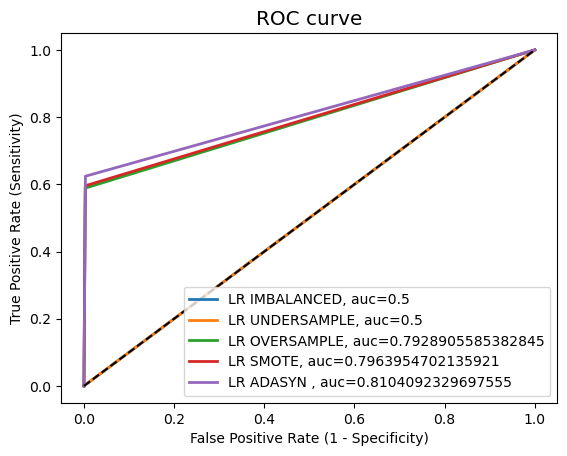

In [22]:
#Logical Regression Classifier
from sklearn.linear_model import LogisticRegression

LRmodel=[]

LRmodel.append(('LR IMBALANCED', LogisticRegression(solver='saga',multi_class='multinomial'),X_train, y_train, X_test, y_test))
LRmodel.append(('LR UNDERSAMPLE', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_under, y_train_under, X_test_under, y_test_under))
LRmodel.append(('LR OVERSAMPLE', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_over, y_train_over, X_test_over, y_test_over))
LRmodel.append(('LR SMOTE', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
LRmodel.append(('LR ADASYN ', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_adasyn, y_train_adasyn, X_test_adasyn, y_test_adasyn))

performance(LRmodel)

Model Name : RF IMABALANCED
Test Accuracy :0.99951
Test AUC : 0.87231
Test Precision : 0.94595
Test Recall : 0.74468
Test F1 : 0.83333
Confusion Matrix : 
 [[84971     6]
 [   36   105]]


Model Name : RF UNDERSAMPLE
Test Accuracy :0.98036
Test AUC : 0.93706
Test Precision : 0.07067
Test Recall : 0.89362
Test F1 : 0.13098
Confusion Matrix : 
 [[83320  1657]
 [   15   126]]


Model Name : RF OVERSAMPLE
Test Accuracy :0.99954
Test AUC : 0.88648
Test Precision : 0.93966
Test Recall : 0.77305
Test F1 : 0.84825
Confusion Matrix : 
 [[84970     7]
 [   32   109]]


Model Name : RF SMOTE
Test Accuracy :0.99949
Test AUC : 0.90770
Test Precision : 0.87121
Test Recall : 0.81560
Test F1 : 0.84249
Confusion Matrix : 
 [[84960    17]
 [   26   115]]


Model Name : RF ADASYN
Test Accuracy :0.99949
Test AUC : 0.90770
Test Precision : 0.87121
Test Recall : 0.81560
Test F1 : 0.84249
Confusion Matrix : 
 [[84960    17]
 [   26   115]]




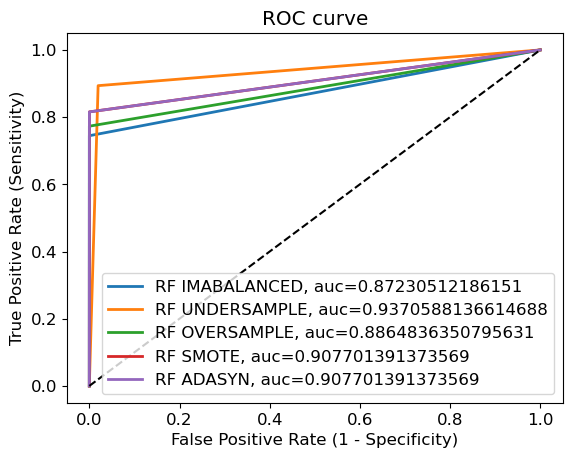

In [23]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RFmodel = []

RFmodel.append(('RF IMABALANCED', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodel.append(('RF UNDERSAMPLE', RandomForestClassifier(),X_train_under, y_train_under, X_test_under, y_test_under))
RFmodel.append(('RF OVERSAMPLE', RandomForestClassifier(),X_train_over, y_train_over, X_test_over, y_test_over))
RFmodel.append(('RF SMOTE', RandomForestClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
RFmodel.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn, y_train_adasyn, X_test_adasyn, y_test_adasyn))

performance(RFmodel)

In [28]:
# Extracting the model and dataset corresponding to 'RF OVERSAMPLE'
oversample_model = None
for name, model, X_train, y_train, X_test, y_test in RFmodel:
    if name == 'RF OVERSAMPLE':
        oversample_model = model
        oversample_X_train = X_train
        oversample_y_train = y_train
        oversample_X_test = X_test
        oversample_y_test = y_test
        break

# Check if the oversample model is found
if oversample_model is not None:
    print("Oversample model loaded successfully!")
else:
    print("Error: 'RF OVERSAMPLE' model not found!")


Oversample model loaded successfully!


In [25]:
import joblib

In [29]:
joblib.dump(oversample_model, 'fraud_detection_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')
print("Model saved as fraud_detection_model.pkl")

Model saved as fraud_detection_model.pkl


In [31]:

print(type(oversample_model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
